<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(U1)=
# Unidad 1

## Introducción. Método de Variables Separables

<!-- (Clase1.1)=
## Clase 1.1 

+++

### Introducción. Método de Variables Separables -->

**Segunda ley de Newton**: La aceleración $a$ de un cuerpo de masa $m$ es proporcional a la fuerza total $F$ ejercida sobre él: 

```{math}
:label: eq1.1
F=ma
```

Supongamos que un cuerpo de masa $m$ cae bajo la única influencia de la gravitación. La única fuerza que actúa sobre él es $mg$, donde $g$ es la aceleración de gravedad. Si $y$ es la altura medida hacia abajo desde una posición fija, entonces $v=\frac{dy}{dt}$ es el ritmo de cambio de su posición y su aceleración $a=\frac{dv}{dt}=\frac{d^2y}{dt^2}$ es el ritmo de cambio de la velocidad. Reemplazando en [](eq1.1) obtenemos 

```{math}
:label: eq1.2
m\frac{d^2y}{dt^2}=mg
```

Esta es una [**Ecuación Diferencial Ordinaria (EDO)**](EDO) de [**Segundo Orden**](SegundoOrden).

La ecuación [](eq1.2) puede ser reescrita como una EDO de [**Primer Orden**](PrimerOrden):

```{math}
:label: eq1.3
m\frac{dv}{dt}=mg
```

Si admitimos que el aire ejerce una fuerza de resistencia proporcional a la velocidad (con una constante de proporcionalidad $k>0$), la fuerza total que actúa sobre el cuerpo es $mg-kv$ y la ecuación [](eq1.3) queda  

\begin{equation*}
    m\frac{dv}{dt}=mg-kv 
\end{equation*}

¿Es posible determinar la velocidad $v(t)$ del cuerpo en cualquier instante $t$ si su velocidad inicial es $v(0)=v_0$?

Si consideramos esta condición, tenemos el [**Problema de Valor Inicial (PVI)**](DefPVI)

$$\mathbf{PVI}~~~~\left\{\begin{array}{ccc}m\dfrac{dv}{dt}&=&mg-kv\\&&\\ v(0)&=&v_0\end{array}\right.$$

Sin resolver explícitamente el PVI, podemos visualizar esta solución mediante el siguiente código de Python:

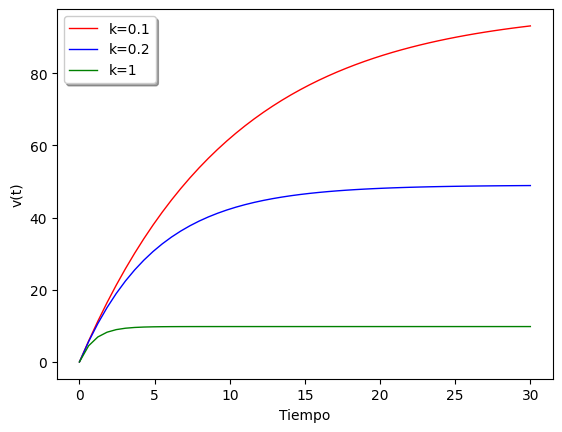

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# función que entrega dv/dt
def modelo(v,t,k):
    dvdt = g - k * v/m
    return dvdt

# condición inicial
v0 = 0

#parámetros
g = 9.8
m = 1 

# valores de tiempo
t = np.linspace(0,30)

# soluciones EDO para distintos k
k = 0.1
v1 = odeint(modelo,v0,t,args=(k,))
k = 0.2
v2 = odeint(modelo,v0,t,args=(k,))
k = 1
v3 = odeint(modelo,v0,t,args=(k,))

# gráfico
plt.plot(t,v1,'r',linewidth=1,label='k=0.1')
plt.plot(t,v2,'b',linewidth=1,label='k=0.2')
plt.plot(t,v3,'g',linewidth=1,label='k=1')
plt.xlabel('Tiempo')
plt.ylabel('v(t)')
plt.legend(shadow=True)
plt.show()

Para determinar una solución del PVI usamos el [**método de separación de variables**](SepVar):

\begin{align*}
    m\dfrac{dv}{dt}&=mg-kv~\Rightarrow~m\frac{dv}{mg-kv}=dt~\Rightarrow~m\int\frac{dv}{mg-kv}=\int dt\\
    &\Rightarrow -\frac{m}{k}\ln\left|mg-kv\right|=t+K_1~\Rightarrow~\ln\left|mg-kv\right|=-\frac{k}{m}t+K_2\\
    &\Rightarrow mg-kv=K_3e^{-\frac{k}{m}t}
\end{align*}

Si imponemos la condición $v(0)=v_0$ obtenemos que $K_3=mg-kv_0$. Finalmente, despejamos $v$ y la velocidad de caída del cuerpo en el instante $t$ es

$$
v(t)=\frac{mg}{k}+\left(v_0-\frac{mg}{k}\right)e^{-\frac{k}{m}t}
$$

Esta es una [**solución explícita**](Explicita) del PVI y su [**intervalo de definición**](Intervalo) es $t\in\mathbb{R}_0^+$.

Python también nos permite encontrar una solución general del PVI:

In [2]:
from sympy import symbols, Function, dsolve

# Símbolos
t, g, k , m, v0= symbols("t, g, k, m, v0")

# v es función del tiempo
v = Function('v')(t)

# Derivada de v
dvdt = v.diff(t)

# Ecuación diferencial
eq = dvdt - g + k*v/m

# Solución de la EDO con la condición inicial v(0)=v0
dsolve(eq, v, ics={v.subs(t, 0): v0})

Eq(v(t), g*m/k + (-g*m + k*v0)*exp(-k*t/m)/k)

```{admonition} Ejercicio Aplicado y Teórico
Establezca un PVI que exprese la posición $y(t)$ del cuerpo en cualquier instante $t$ si su posición inicial es $y(0)=y_0$. Sin resolver el PVI, visualice sus soluciones para distintos valores de los parámetros involucrados. ¿Qué ocurre cuando $t\to\infty$? Finalmente, determine la solución explícita del PVI de modo analítico y también usando Python. 
```

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Ecuaciones Lineales de Primer Orden

En la clase anterior, analizamos una EDO a partir de un modelo dado, hoy comenzaremos con una situación similar y terminaremos con la construcción de una EDO de modo general siguiendo principios físicos y matemáticos.

### Ley de Enfriamiento de Newton

Esta ley establece que la rapidez con que cambia la temperatura $T(t)$ de un cuerpo en el instante $t$ es proporcional a la diferencia entre la temperatura de dicho cuerpo y la del medio $T_m$ que lo rodea.

Así, obtenemos la EDO

$$
\frac{dT}{dt}=k(T-T_m)
$$ (eq2.1)

Si $T_m$ es constante, la ecuación [](eq2.1) es de variables separables; en cambio, si $T_m=f(t)$ (varía en el tiempo), es una EDO [**Lineal de Primer Orden**](Lineal1er).

En particular, si $T_m=20+10\sin(0.1t)$, $T(0)=100$ y $k=0.1$, la temperatura de un objeto se puede modelar como

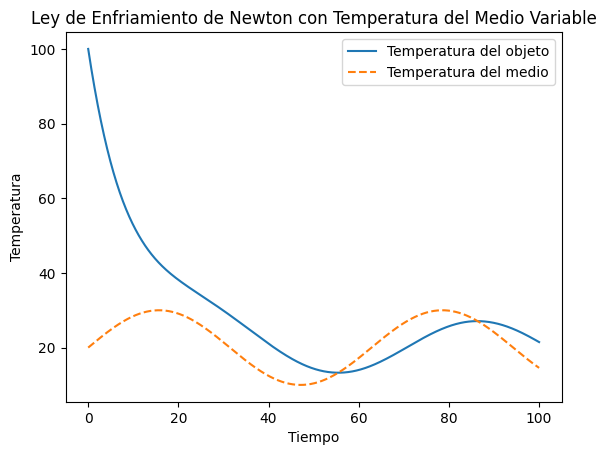

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la ley de enfriamiento de Newton
k = -0.1  # Constante de enfriamiento

# Función que define la temperatura del medio variable en el tiempo
def T_m(t):
    return 20 + 10 * np.sin(0.1 * t)

# Definición de la EDO para la ley de enfriamiento de Newton
def Newton(t, T):
    return k * (T - T_m(t))

# Condición inicial
T0 = 100  # Temperatura inicial del objeto

# Intervalo de tiempo para la simulación
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver la EDO
sol = solve_ivp(Newton, t_span, [T0], t_eval=t_eval)

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='Temperatura del objeto')
plt.plot(sol.t, T_m(sol.t), label='Temperatura del medio', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.title('Ley de Enfriamiento de Newton con Temperatura del Medio Variable')
plt.show()

¿Es posible plantear un modelo más realista?

```{admonition} Ejercicio Aplicado
Obtenga los datos de la estación meteorológica del aeródromo de Tobalaba para un día cualquiera (Estación 330019). Ajuste esos datos a una curva y úsela como temperatura del medio. Estudie la situación anterior para este caso.
```

### Mezclas

Consideremos un tanque que contiene una solución (mezcla de sal y solvente). Existen tanto flujos de entrada como de salida y se quiere calcular la cantidad $x(t)$ de solución en el tanque en el instante $t$, donde la cantidad de solución (sal) inicial en el tanque es $x(0)=x_0$.

Suponga que la sustancia, con una concentración constante de $c_i~[gr/lt]$ de solución, fluye dentro del tanque a una velocidad constante de $r_i~[lt/seg]$ y que la solución en el tanque (que permanece completamente mezclada por agitación) fluye hacia afuera a una velocidad constante de $r_0~[lt/seg]$ con una concentración de $c_0~[gr/lt]$.

```{figure} Mezclas.png
---
height: 150px
name: Mezclas
---
Modelo de Mezclas
```

Con el fin de determinar una ED0 para $x(t)$, estimamos el cambio $\Delta x$ durante un breve intervalo de tiempo $[t,t+\Delta t]$. La cantidad de sal que fluye dentro del tanque durante $\Delta t$ segundos es 

$$
r_i\cdot c_i\cdot\Delta t~[gr].
$$

Notamos que la cantidad de sal $x$ en un intervalo de tiempo infinitesimal es 

$$
\Delta x=\{gr~entrada\}-\{gr~salida\}
$$ 

$$
\approx r_i\cdot c_i\cdot\Delta t-r_0\cdot c_0\cdot\Delta t~~\Rightarrow~~\frac{\Delta x}{\Delta t}\approx r_i\cdot c_i-r_0\cdot c_0.
$$ 

Haciendo $\Delta t\to0$, obtenemos la ED 

$$
\frac{dx}{dt}=r_i\cdot c_i-r_0\cdot c_0.
$$ 

En general, la cantidad de sal que fluye hacia afuera del tanque, depende de la concentración $c_0(t)$ de sal presente en la solución en el instante $t$. Pero 

$$
c_0(t)=\frac{x(t)}{V(t)}
$$

donde $V(t)$ es el volumen de la solución en el instante $t$ ($V(t)$ es no constante a menos que $r_i=r_0$). Reemplazando, obtenemos la ED 

$$
\frac{dx}{dt}=r_i\cdot c_i-\frac{r_0}{V}\cdot x.
$$ 

Notamos que la razón de cambio del volumen en el tiempo, depende de la velocidad inicial $r_i$ y final $r_0$; es decir, 

$$
\frac{dV}{dt}=r_i-r_0~~\Rightarrow~~V(t)=(r_i-r_0)t+K.
$$

Poniendo la condición inicial $V(0)=V_0$, obtenemos $V(t)=(r_i-r_0)t+V_0$. 

Por lo tanto, la ED que modela el problema de mezclas es 

$$
\frac{dx}{dt}=r_i\cdot c_i-\frac{r_0}{(r_i-r_0)t+V_0}\cdot x
$$ 

¿Qué tipo de ecuación es esta?

```{admonition} Ejercicio Aplicado y Teórico
Determine la solución explícita de la ecuación anterior de modo analítico y también usando Python. 
```

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Crecimiento Poblacional. Ecuación Logística

### Crecimiento de Población

La razón con que una población $P(t)$ cambia en un cierto tiempo $t$ es proporcional a la población total $P(t)$ en ese tiempo 

$$
\frac{dP}{dt}=kP
$$ 

Esta EDO es de variables separables y su solución es $P(t)=P_0e^{kt}$, donde $P_0=P(0)$ es la población inicial. 

```{admonition} Ejercicio Teórico
De acuerdo a datos del [INE](https://www.ine.gob.cl/estadisticas/sociales/demografia-y-vitales/proyecciones-de-poblacion) la tasa de crecimiento demográfico de Chile en el año 2020 fue de un $1.12\%$ (Ver "Cuadros Estadísticos-Proyección Base 2017" documento "Estimaciones y Proyecciones 1992-2050"). Si ese año la población chilena era de $19458310$ y la tasa de crecimiento se mantiene constante, calcule la población chilena al año 2023. La estimación del INE para la población chilena del año 2023 fue de $19960889$, ¿hay alguna discrepancia con su cálculo?, ¿cómo podría explicarla para mejorar su modelo? 
```

### Un Modelo no Lineal: Ecuación Logística

Suponga que la población $P(t)$ cambia sólo por la ocurrencia de nacimientos y muertes. Sean $\beta(t)$ y $\alpha(t)$ la tasa de nacimientos y muertes, respectivamente. 

Entonces, el número de nacimientos y muertes que se registran durante el intervalo de tiempo $[t, t+\Delta t]$ está dado (aproximadamente) por 

$$
\text{nacimientos}: \beta(t)\cdot P(t)\cdot\Delta t~,~\text{muertes}: \alpha(t)\cdot P(t)\cdot\Delta t
$$

Por tanto, el cambio $\Delta P$ en la población durante el intervalo de tiempo $[t, t+\Delta t]$ es 

$$
\Delta P=[\text{nacimientos} - \text{muertes}]\approx\beta(t)\cdot P(t)\cdot\Delta t-\alpha(t)\cdot P(t)\cdot\Delta t
$$

Así 

$$
\frac{\Delta P}{\Delta t}\approx\big(\beta(t)-\alpha(t)\big)P(t)
$$

Haciendo $\Delta t\to 0$, obtenemos la EDO de **población general** 

$$
\frac{dP}{dt}=\big(\beta(t)-\alpha(t)\big)P(t)
$$

Habitualmente la tasa de nacimientos decrece en la medida en que una población se incrementa debido a, por ejemplo, una mayor sofisticación científica o cultural, hasta una limitación en el suministro de alimentos.

Para simplificar el problema, supondremos que la tasa de nacimientos $\beta(t)$ es una función lineal decreciente del tamaño de la población $P(t)$, tal que $\beta(t)=\beta_0-\beta_1P$ donde $\beta_0,\beta_1$ son constantes positivas. Si la tasa de mortalidad $\alpha(t)=\alpha_0$ permanece constante, entonces la ecuación de población general toma la forma 

$$
\frac{dP}{dt}=\big(\beta_0-\beta_1P-\alpha_0\big)P
$$

Es decir 

$$
\frac{dP}{dt}=aP-bP^2
$$ 

donde $a=\beta_0-\alpha_0$ y $b=\beta_1$. Si $a,b>0$ entonces la EDO anterior se denomina **ecuación logística**. 

Estableciendo la condición inicial $P(0)=P_0$ y separando variables, podemos obtener la solución de la ecuación logística: 

$$
P(t)=\frac{aP_0}{bP_0+(a-bP_0)e^{-at}}
$$

<!-- La EDO logística es una ecuación autónoma, por lo que podemos estudiar su solución $P(t)$ de manera cualitativa: -->